<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импортирование-библиотек-и-функций" data-toc-modified-id="Импортирование-библиотек-и-функций-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импортирование библиотек и функций</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Названия-колонок-и-пропуски" data-toc-modified-id="Названия-колонок-и-пропуски-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Названия колонок и пропуски</a></span></li><li><span><a href="#Тип-данных-и-кодирование-категорий" data-toc-modified-id="Тип-данных-и-кодирование-категорий-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Тип данных и кодирование категорий</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вес-классов-и-стратификация-при-разделении-выборок" data-toc-modified-id="Вес-классов-и-стратификация-при-разделении-выборок-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вес классов и стратификация при разделении выборок</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Достаточным показателем будет доведение метрики до 0.59.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Цель исследования:** 
1. Создание модели предсказани ухода клиента с помощью машинного обучения.

**Задачи исследования:**
1. Выделить данные на 3 выборки: обучающую, валидационную и тестовую
2. Подобрать оптимальную модель машинного обучения
3. Участь в модели дисбаланс классов
3. Проверить оптимальную модель на тестовой выборке с учетом дисбаланса

**Объектом исследования** является информация о клиентах банка, которые остаются и отказываются от услуг банка "Бета-Банка".

**Предметом исследования** является комплекс методик машинного обучения и проверки обученных моделей с помощью метрик

**Ход выполнения**
1. Импортировать все необходимые библиотеки
2. Загрузить данные из файла '/datasets/Churn.csv'
3. Проанализировать общую информацию о качестве и структуре данных, предобработать данные
4. Разбить все данные на обучающую, валидационнаю и тестовую выборки
5. Перебрать возможные модели машинного обучения и их гиперпараметры для выявления модели, обеспечивающую максимальное значение метрики F1 (а так же в сравнении с метрикой AUC-ROC)
6. Проверить лучшую модель на тестовой выборке
7. Сделать выводы и рекомендации для дальнейшего исследования

**Описание данных**

Каждый объект в наборе данных — это информация клиентах банка. 
Известно:
- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

Целевой признак
- `Exited` — факт ухода клиента (0 - остался, 1 - ушел)

## Импортирование библиотек и функций

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.ensemble import RandomForestClassifier as Forest
from sklearn.linear_model import LogisticRegression 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (confusion_matrix, 
                             f1_score,
                             roc_auc_score, 
                             roc_curve,
                             accuracy_score,
                             precision_score,
                             recall_score)
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

In [2]:
#функция построения AUC-ROC кривой
def make_roc_curve(_features, _target):
    probabilities_one = model.predict_proba(_features)[:, 1]
    fpr, tpr, thresholds = roc_curve(_target, probabilities_one)
    plt.figure()
    plt.plot(fpr, tpr)
    # ROC-кривая случайной модели
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.xlim(0,1)
    plt.ylim(0,1)

    plt.xlabel("False Positive Rate")
    plt.ylabel('True Positive Rate')

    plt.title("ROC-кривая")

    plt.show();
    print('AUC-ROC:',roc_auc_score(_target, probabilities_one))

In [3]:
#функция апсемплинга для борьбы с дисбалансом
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

## Обзор данных

In [4]:
data = pd.read_csv('/datasets/Churn.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


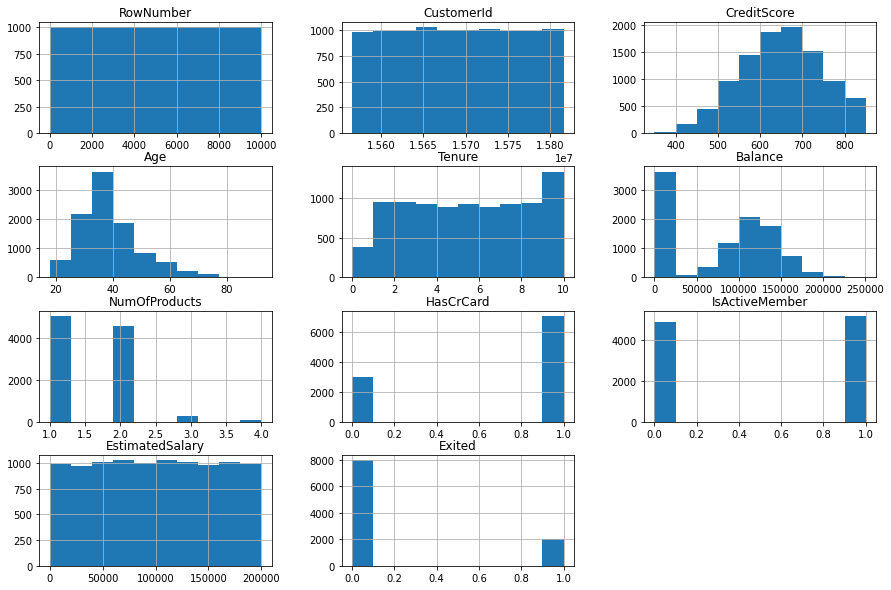

In [8]:
data.hist(figsize=(15,10));

**Вывод:** Посмотрев на данные можно сказать следующее:
- К исследованию они не готовы, есть пропуски в одном столбце(клиентский стаж), важном для нашей будущей модели (попытаемся узнать характер пропусков и заполнить их)
- Так же названия столбцов не в привычном для нас виде(приведем к змеиному регистру)
- В целевом признаке замечен дисбаланс классов (ушедших клиентов в 4 раза больше)
- Для машинного обучения нам не понадобятся первые 3 колонки: номер строки, ID и фамилия клиента.
- Еще одна подозрительная вещь - пик в нуле в колонке баланса, скорее всего это так и есть и это фактические данные, но стоит проверить.
- Для подготовки данных к машинному обечению необходимо будет изменить тип данных некоторых колонок(категориальных) и осуществить кодирование категорий.

## Подготовка данных

### Названия колонок и пропуски

Начнем с преобразования названий колонок в змеиный регистр

In [9]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
data = data.rename(
    columns={
        'RowNumber':'row_number', 
        'CustomerId':'customer_id', 
        'Surname':'surname', 
        'CreditScore':'credit_score', 
        'Geography':'geography',
        'Gender':'gender', 
        'Age':'age', 
        'Tenure':'tenure', 
        'Balance':'balance', 
        'NumOfProducts':'num_of_products', 
        'HasCrCard':'has_cr_card',
        'IsActiveMember':'is_active_member', 
        'EstimatedSalary':'estimated_salary', 
        'Exited':'exited'
    }
)

In [11]:
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Отлично, это сделано, перейдем к пропускам. Мы знаем, что у нас около 9% пропусков в колонке tenure (клиентский стаж).
Посмотрим что это за данные.

In [12]:
data.query('tenure.isnull()')

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


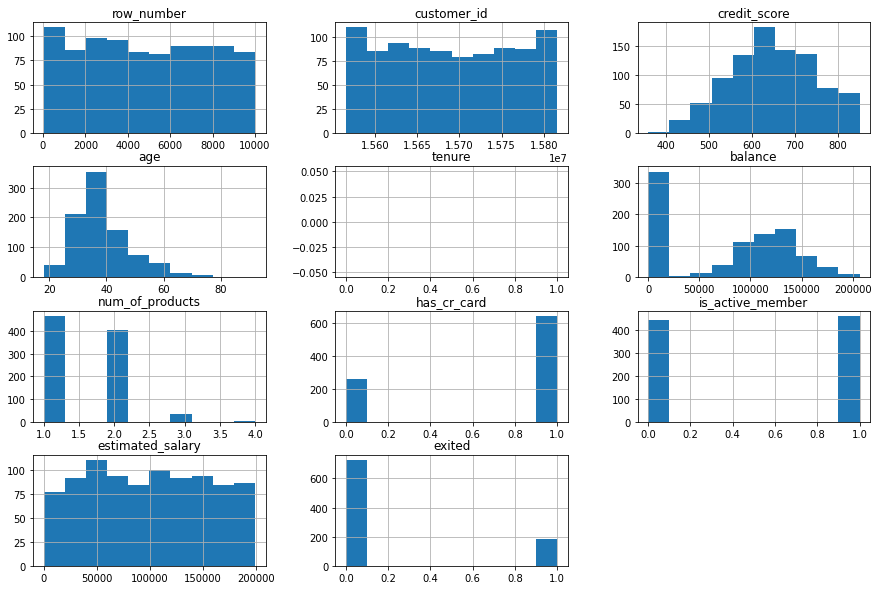

In [13]:
data.query('tenure.isnull()').hist(figsize=(15,10));

Распределения в общих данны и в данных с пропуском в этой колонке примерно одинаковое, зависимостей не обнаружено, характер пропуска неизвестен. Возможные варианты: больше 10 лет, данные утеряны сбоем, данные не занесены случайно.
В любом случае, в данных с пропущеным значением распределение целевого признака такое же как и во всех данных, значит можем от них избавиться без сильного ущерба для обучения модели.

In [14]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        9091 non-null   int64  
 1   customer_id       9091 non-null   int64  
 2   surname           9091 non-null   object 
 3   credit_score      9091 non-null   int64  
 4   geography         9091 non-null   object 
 5   gender            9091 non-null   object 
 6   age               9091 non-null   int64  
 7   tenure            9091 non-null   float64
 8   balance           9091 non-null   float64
 9   num_of_products   9091 non-null   int64  
 10  has_cr_card       9091 non-null   int64  
 11  is_active_member  9091 non-null   int64  
 12  estimated_salary  9091 non-null   float64
 13  exited            9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


### Тип данных и кодирование категорий

Для того, чтобы окончательно подготовить данные к обучению модели, необходимо:
- Возможно изменить тип данных категориальных переменных на object(тут еще стоит подумать относить ли к категориальным такие колонки как age, tenure, num_of_products, т.к. их можно отнести к количественным. С возрастом еще можно перенести в возрастные категории. Ладно, пока что изменим только 2 колонки, пусть возраст, клиентский стаж и количество продуктов будут как количественные переменные в нашем обучении)
- Избавиться от ненужных колонок (первые 3) и отделить целевой показатель от факторов
- Разбить данные на 3 выборки

In [15]:
data.loc[:, 'has_cr_card':'is_active_member'] = data.loc[:, 'has_cr_card':'is_active_member'].astype('object', errors='ignore')

In [16]:
data['tenure'] = data['tenure'].astype('int64', errors='ignore')

In [17]:
data.dtypes

row_number            int64
customer_id           int64
surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_cr_card          object
is_active_member     object
estimated_salary    float64
exited                int64
dtype: object

Тип данны изменили, переходим к выделению целевой переменной и факторов

In [18]:
#features = data.loc[:,'credit_score':'estimated_salary']
features = pd.get_dummies(data.loc[:,'credit_score':'estimated_salary'], drop_first=True)
target = data['exited']

In [19]:
features.head(5)

,credit_score,age,tenure,balance,num_of_products,estimated_salary,geography_Germany,geography_Spain,gender_Male,has_cr_card_1,is_active_member_1
0,619,42,2,0.00,1,101348.88,0,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,0,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,1,0,1,1


In [20]:
#Разделяем данные на 3 выборки(тренировочные, валидационные, тестовые)
features_train, features_1, target_train, target_1 = train_test_split(
    features, target, test_size=0.40, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_1, target_1, test_size=0.50, random_state=12345)

In [21]:
for df in ['features_train','target_train','features_valid', 'target_valid', 'features_test', 'target_test']:
    print(f'Размерность {df}: {globals()[df].shape}')

Размерность features_train: (5454, 11)
Размерность target_train: (5454,)
Размерность features_valid: (1818, 11)
Размерность target_valid: (1818,)
Размерность features_test: (1819, 11)
Размерность target_test: (1819,)


Дополнительно масштабируем количественные признаки для уравновешивания их значимости

In [22]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Данные готовы для создания модели машинного обучения:
- Выделены 3 выборки в оптимальной пропорции (60/20/20)
- размеры выборок проверены
- Категории в признаках перекодированы
- Пропуски удалены
- Количественные признаки промасштабированы

## Исследование задачи

В нашем исследовании мы будем проверять 3 модели(логистическая регрессия, дерево решений и случайный лес) и подбирать к ним оптимальные гиперпараметры.

Лучший показатель F1 обеспечивает модель DecisionTreeClassifier(max_depth=7, random_state=12345) - 0.5773524720893142


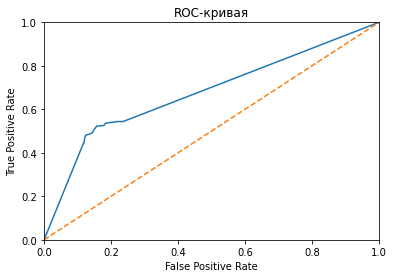

AUC-ROC: 0.6774602075997179
CPU times: user 379 ms, sys: 11.1 ms, total: 391 ms
Wall time: 389 ms


In [23]:
%%time
best_model_tree = None
best_result_tree = 0
for d in range(1,16):
    model = Tree(random_state=12345, max_depth = d)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)
    if result > best_result_tree:
        best_model_tree = model
        best_result_tree = result
print(f'Лучший показатель F1 обеспечивает модель {best_model_tree} - {best_result_tree}')
make_roc_curve(features_valid, target_valid)

F1: 0.509731232622799


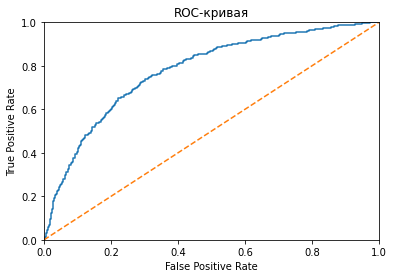

AUC-ROC: 0.7778123429610663
CPU times: user 209 ms, sys: 94.2 ms, total: 303 ms
Wall time: 311 ms


In [24]:
%%time
model = LogisticRegression(
    random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
result = f1_score(target_valid, predictions)
print("F1:", result)
make_roc_curve(features_valid, target_valid)

In [25]:
for d in range(5,20):
    model = Forest(
        random_state=12345, max_depth = d, n_estimators=20)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)
    print(model)
    print("F1:", result)


RandomForestClassifier(max_depth=5, n_estimators=20, random_state=12345)
F1: 0.49624060150375937
RandomForestClassifier(max_depth=6, n_estimators=20, random_state=12345)
F1: 0.5535714285714285
RandomForestClassifier(max_depth=7, n_estimators=20, random_state=12345)
F1: 0.5578947368421053
RandomForestClassifier(max_depth=8, n_estimators=20, random_state=12345)
F1: 0.5543859649122806
RandomForestClassifier(max_depth=9, n_estimators=20, random_state=12345)
F1: 0.5753424657534246
RandomForestClassifier(max_depth=10, n_estimators=20, random_state=12345)
F1: 0.5874363327674024
RandomForestClassifier(max_depth=11, n_estimators=20, random_state=12345)
F1: 0.5811965811965811
RandomForestClassifier(max_depth=12, n_estimators=20, random_state=12345)
F1: 0.575206611570248
RandomForestClassifier(max_depth=13, n_estimators=20, random_state=12345)
F1: 0.5811688311688311
RandomForestClassifier(max_depth=14, n_estimators=20, random_state=12345)
F1: 0.5866666666666667
RandomForestClassifier(max_depth=15

In [26]:
best_model_forest = None
best_result_forest = 0
for e in range(10,101,10):
    model = Forest(
        random_state=12345, max_depth = 15, n_estimators=e)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)
    if result > best_result_forest:
        best_model_forest = model
        best_result_forest = result
    print(model)
    print("F1:", result)
print(f'Лучший показатель F1 обеспечивает модель {best_model_forest} - {best_result_forest}')

RandomForestClassifier(max_depth=15, n_estimators=10, random_state=12345)
F1: 0.5601317957166393
RandomForestClassifier(max_depth=15, n_estimators=20, random_state=12345)
F1: 0.5941558441558442
RandomForestClassifier(max_depth=15, n_estimators=30, random_state=12345)
F1: 0.6013071895424836
RandomForestClassifier(max_depth=15, n_estimators=40, random_state=12345)
F1: 0.5934426229508196
RandomForestClassifier(max_depth=15, n_estimators=50, random_state=12345)
F1: 0.5841584158415842
RandomForestClassifier(max_depth=15, n_estimators=60, random_state=12345)
F1: 0.5864909390444811
RandomForestClassifier(max_depth=15, n_estimators=70, random_state=12345)
F1: 0.5851239669421487
RandomForestClassifier(max_depth=15, n_estimators=80, random_state=12345)
F1: 0.5833333333333334
RandomForestClassifier(max_depth=15, n_estimators=90, random_state=12345)
F1: 0.5785953177257526
RandomForestClassifier(max_depth=15, random_state=12345)
F1: 0.5771144278606966
Лучший показатель F1 обеспечивает модель Random

Получили следующие показатели F1 на валидационной выборке: дерево решений (F1 = 0,577), Случайный лес (F1 = 0,603), а логистическая регрессия показала совсем низкие результаты. 

0.5591397849462365


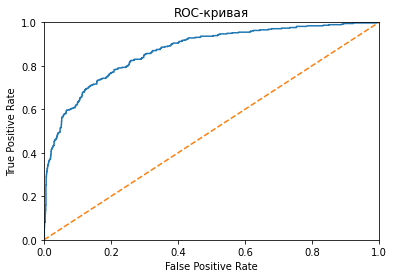

AUC-ROC: 0.8690766985054956


In [27]:
predictions_test = best_model_forest.predict(features_test)
result_forest = f1_score(target_test, predictions_test)
print(result_forest)
make_roc_curve(features_valid, target_valid)

## Борьба с дисбалансом

### Вес классов и стратификация при разделении выборок

Бороться с дисбалансом можно разными способами: Это и увеличение/уменьшение выборок(меньшего/большего класса соответственно), и добавление гиперпараметров при разделении на обучающую, валидационную и тестовую выборки  и точно такое же при обучении модели (class_weight='balanced'), и увеличение/уменьшение порога классификации.

В первую очередь сбалансируем выборки и добавим новый гиперпараметр нашей оптимальной модели

In [28]:
features_train, features_1, target_train, target_1 = train_test_split(
    features, target, test_size=0.40, random_state=12345, stratify = target)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_1, target_1, test_size=0.50, random_state=12345, stratify = target_1)
for df in ['features_train','target_train','features_valid', 'target_valid', 'features_test', 'target_test']:
    print(f'Размерность {df}: {globals()[df].shape}')

Размерность features_train: (5454, 11)
Размерность target_train: (5454,)
Размерность features_valid: (1818, 11)
Размерность target_valid: (1818,)
Размерность features_test: (1819, 11)
Размерность target_test: (1819,)


In [29]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

F1: 0.5983471074380166


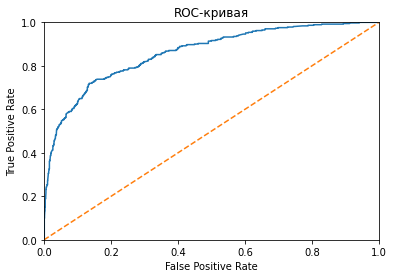

AUC-ROC: 0.8601353856012162


In [30]:
model = Forest(
        random_state=12345, max_depth = 15, n_estimators=30)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
result = f1_score(target_valid, predictions)
print("F1:", result)
make_roc_curve(features_valid, target_valid)

F1: 0.5915032679738562


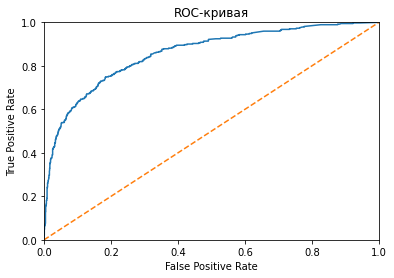

AUC-ROC: 0.8577901672202176


In [31]:
model = Forest(
        random_state=12345, max_depth = 15, n_estimators=30, class_weight='balanced')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
result = f1_score(target_valid, predictions)
print("F1:", result)
make_roc_curve(features_valid, target_valid)

Добавив новый гиперпараметр при разделении на выборке и обучении модели случайного леса мы добились увеличения показателя F1 (хоть это и всего 3%, но теперь мы добились нужного показателя на тестовой выборке - 59,9%)

### Увеличение выборки

Попробуем так же метод увеличения выборки (upsampling) 

In [32]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

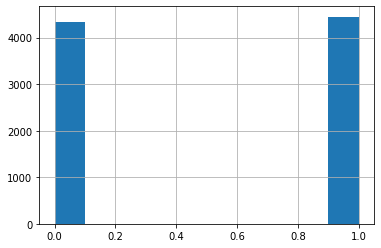

In [33]:
target_upsampled.hist();

F1: 0.6132208157524613


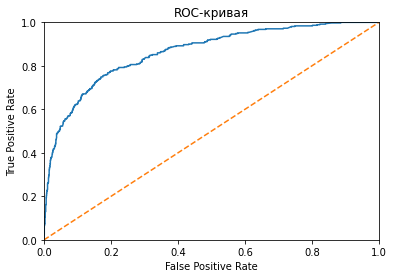

AUC-ROC: 0.8624312407676817


In [34]:
model = Forest(
        random_state=12345, max_depth = 15, n_estimators=30)
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_valid)
result = f1_score(target_valid, predictions)
print("F1:", result)
make_roc_curve(features_valid, target_valid)

Увеличение выборки дало еще больший результат(F1=60,9%, и не менее хороший покаатель AUC-ROC = 0.86), остановимся на этой модели для проверки на тестовой выборке

## Тестирование модели

Точность: 0.6317365269461078
Полнота 0.568733153638814
F1: 0.598581560283688
Accuracy: 0.8444200109950523


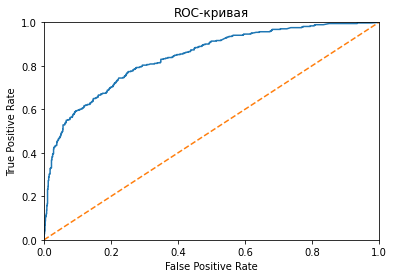

AUC-ROC: 0.8401922532799214


In [35]:
predictions_test = model.predict(features_test)
result = f1_score(target_test, predictions_test)
print('Точность:', precision_score(target_test, predictions_test))
print("Полнота", recall_score(target_test, predictions_test))
print("F1:", result)
print('Accuracy:', accuracy_score(target_test, predictions_test))
make_roc_curve(features_test, target_test)


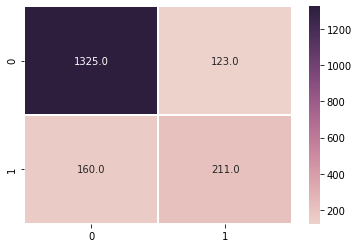

In [36]:
cm = confusion_matrix(target_test, predictions_test)
sns.heatmap(cm, annot=True, fmt='.1f', linewidths=.5, cmap=sns.cubehelix_palette(as_cmap=True));

На тестовой выборке модель показала необходимое значение F1 = 59.9% (необходимо больше 59%)

**Вывод:** Модель выявляет 56% положительных ответов от всех положительных ответов. Модель нашла 63% отрицательных ответов пока искала положительные. 
А среднее гармоническое полноты и точности (F1-мера) равна 59,9%

## Итоговый вывод

**1.** Была достигнута цель исследования - построена модель предсказания отказа клиента от услуг банка (уход клиента) с помощью машинного обучения обеспечивающая достаточый показатель F1 меры(более 59%), для этого было сделано:
- Разделены данные на 3 выборки: обучающую, валидационную и тестовую в соотношении 3:1:1
- Категориальные признаки перекодированы, количественные признаки промасштабированы
- Проверены 3 модели: решающее дерево, случайный лес, логистическая регрессия.
- Модель показавшая лучший результат была оптимизирована с помощью подбора гиперпараметров.
- Учтен дисбаланс классов и проверены 2 способа балансирования классов(гиперпараметр при делении на выборки и обучении модели и метод увеличения выборки).
- Подробно рассмотрены ошибки подобранной модели классификации (из 15.5% ошибок: 8.7% неврно определяет как клиента который останется, а 6.7% неверно предполагает, что клиент уйдет)
    
**2.** В конечном итоге у нас есть модель, которая обеспечивает необходимый уровень F1-меры на тестовой выборке: 
- Случайный лес 30 деревьев глубиной 15 показывает F1=59.9%
 